In [451]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [452]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import SVM
from test_data import TestLinear
import numpy as np
import matplotlib.pyplot as plt
import random

Using random seed: 335
f_best=0.0
f_k=0.0, f_ref=inf, f_best=0.0, f_as=4252605.702603264
Iteration 1: τ = 1.7628e-04, Δα = 3.8730e+01
f_k=4252605.702603264, f_ref=inf, f_best=0.0, f_as=72843.87617882463
Iteration 2: τ = 1.0000e-05, Δα = 3.0485e+01
f_k=72843.87617882463, f_ref=inf, f_best=0.0, f_as=70647.70467269555
Iteration 3: τ = 1.0000e-05, Δα = 1.4850e-01
f_k=70647.70467269555, f_ref=inf, f_best=0.0, f_as=68545.30863455903
Iteration 4: τ = 1.0000e-05, Δα = 1.4541e-01
f_k=68545.30863455903, f_ref=inf, f_best=0.0, f_as=66540.37896676989
Iteration 5: τ = 1.0000e-05, Δα = 1.4192e-01
f_k=66540.37896676989, f_ref=inf, f_best=0.0, f_as=64634.88842654627
Iteration 6: τ = 1.0000e-05, Δα = 1.3830e-01
f_k=64634.88842654627, f_ref=inf, f_best=0.0, f_as=62821.36911163008
Iteration 7: τ = 1.0000e-05, Δα = 1.3497e-01
f_k=62821.36911163008, f_ref=inf, f_best=0.0, f_as=61092.794249274666
Iteration 8: τ = 1.0000e-05, Δα = 1.3175e-01
f_k=61092.794249274666, f_ref=inf, f_best=0.0, f_as=59438.622156834

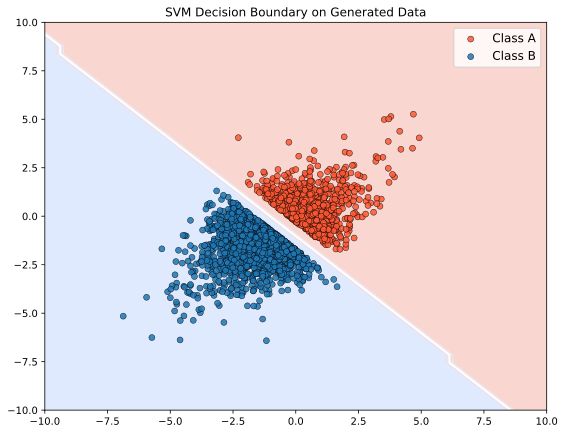

In [453]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 1000
n_B = 2000
margin = 0.5

random_seed = random.randint(0, 1000)
print(f"Using random seed: {random_seed}")
#random_seed = 146

listA, listB = TestLinear(w, b, n_A, n_B, margin, seed=random_seed)

# Convert lists to numpy arrays
X_A = np.array(listA)
X_B = np.array(listB)
X = np.vstack((X_A, X_B))
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

# Train the SVM
svm = SVM(C=1.0, kernel="linear", lr=0.01, mode="dual", sigma=2.5, s=1.0, max_iter=10000, tol=1e-4)
%time svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)
print("Finished predict")

# Plot the results
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, preds, alpha=0.4, colors=["#AFCBFF", "#F19C8A"])
plt.contour(xx, yy, preds, levels=[0], linewidths=2, colors="white")
plt.scatter(X_A[:, 0], X_A[:, 1], color="#FF5733", label="Class A", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.scatter(X_B[:, 0], X_B[:, 1], color="#1F77B4", label="Class B", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.legend(frameon=True, fontsize=12, loc="upper right")
plt.title("SVM Decision Boundary on Generated Data")
plt.show()